# DBSCAN Clustering
This notebook demonstrates DBSCAN clustering on a real-world dataset (Iris dataset from sklearn).

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load and Prepare the Data

In [25]:
wine = load_wine()
X = wine.data
y = wine.target
n_clusters = len(np.unique(y))
print(f"Feature names: {wine.feature_names}")
print(f"Number of classes: {n_clusters}")


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Number of classes: 3


In [21]:
print(f'Number of classes: {len(np.unique(y))}')

Number of classes: 3


## data preprocessing

In [50]:
X_scaled = StandardScaler().fit_transform(X)

## Apply DBSCAN Clustering

In [66]:
dbscan = DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

## Visualize Original data with PCA

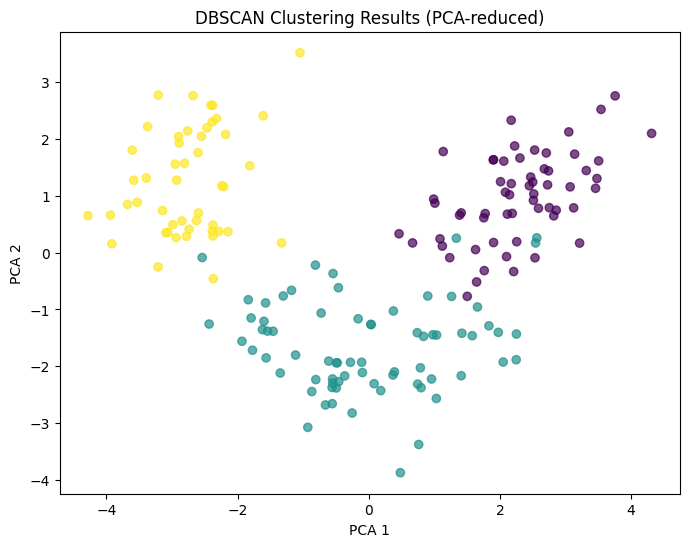

In [46]:
pca = PCA(n_components=13)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Visualize results of DBSCAN with epsilon of 0.1

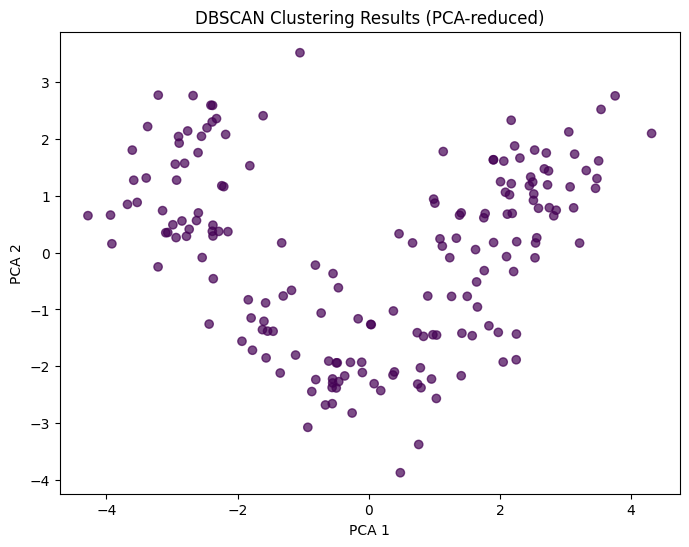

In [49]:
pca = PCA(n_components=13)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.figure(figsize=(8,6))
# Plot the clusters
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering Results (PCA-reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Experiments with different epsilon and min_samples

### min_samples = 1

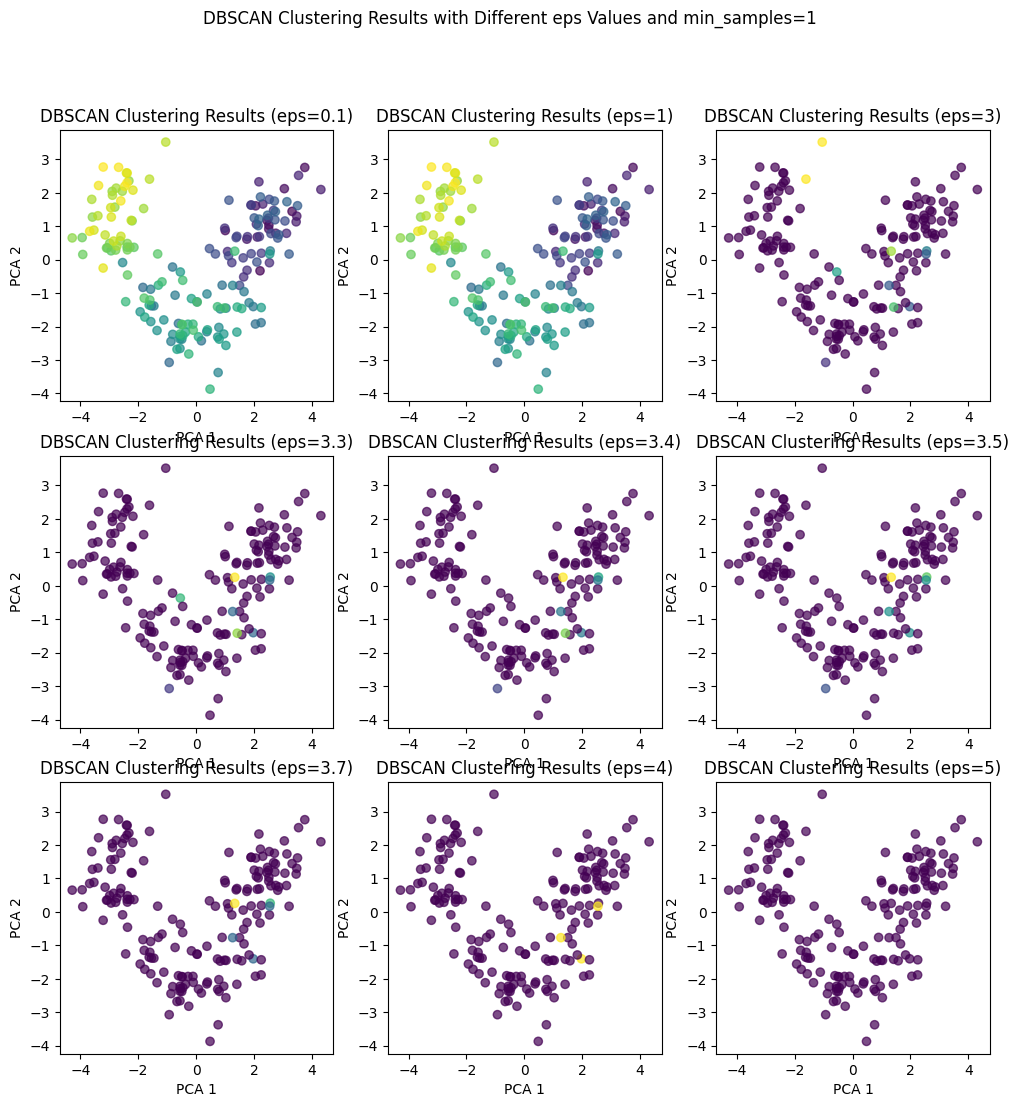

In [104]:
# create a plot with different eps values in multiple rows
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
eps_values = [0.1, 1, 3, 3.3, 3.4, 3.5, 3.7, 4, 5]
for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=1)
    clusters = dbscan.fit_predict(X_scaled)
    pca = PCA(n_components=13)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    
    ax = axs[i // 3, i % 3]
    ax.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
    ax.set_title(f'DBSCAN Clustering Results (eps={eps})')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
fig.suptitle('DBSCAN Clustering Results with Different eps Values and min_samples=1', fontsize=12)
plt.show()


### min_samples = 2

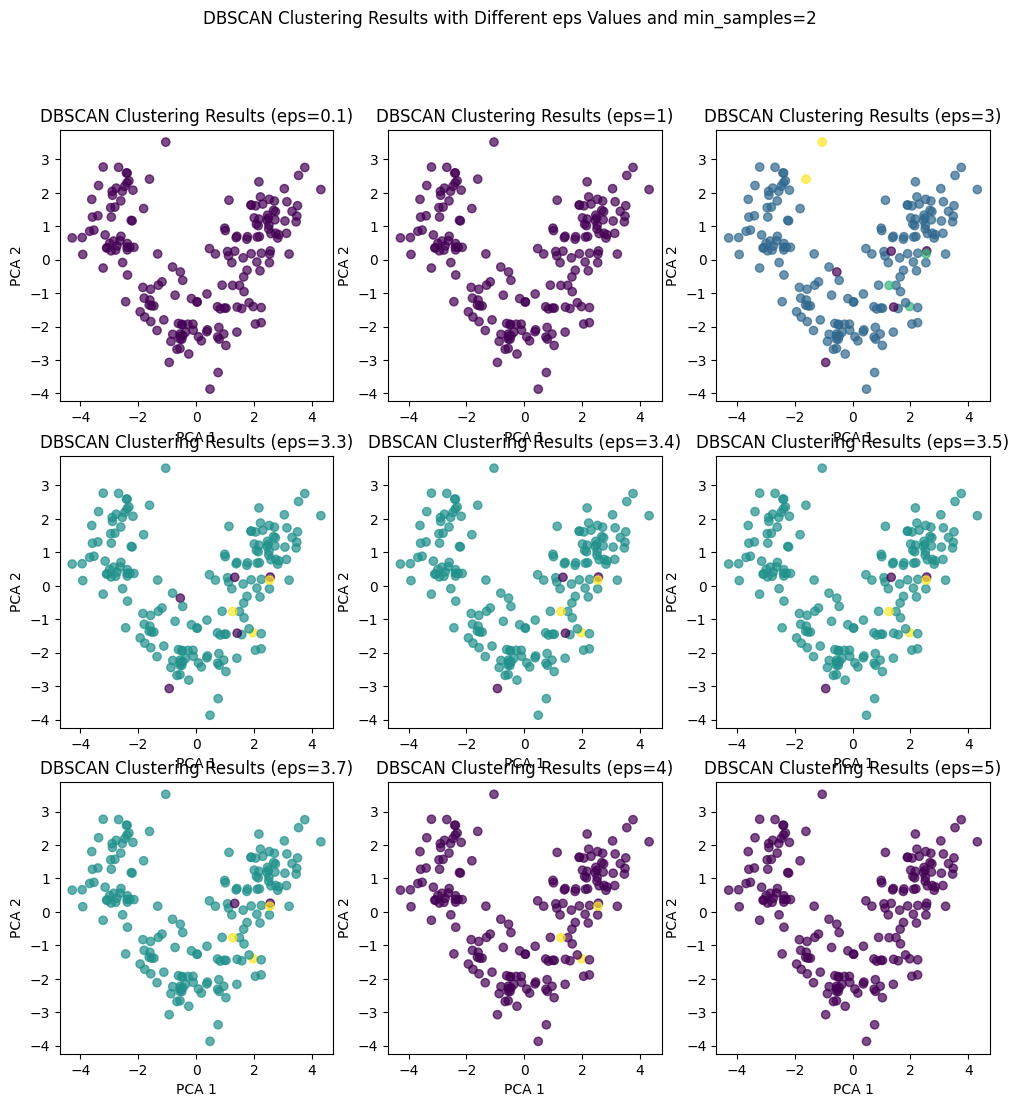

In [102]:
# create a plot with different eps values in multiple rows
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
eps_values = [0.1, 1, 3, 3.3, 3.4, 3.5, 3.7, 4, 5]
for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=2)
    clusters = dbscan.fit_predict(X_scaled)
    pca = PCA(n_components=13)
    pca.fit(X_scaled)
    X_pca = pca.transform(X_scaled)
    
    ax = axs[i // 3, i % 3]
    ax.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
    ax.set_title(f'DBSCAN Clustering Results (eps={eps})')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
#add title to the whole figure
fig.suptitle('DBSCAN Clustering Results with Different eps Values and min_samples=2', fontsize=12)
plt.show()


## Analysis and discussion
The first attempt of DBSCAN with min_sample of 5 and epsilon of 0.1 was not successful that the whole data was a large cluster. Thus, I did some experiements on min_sample and epsilon parameters. In many of the results, the were only two clusters, and one of them contains less than three, and the other cluster contains the rest. The results with min_sample=1 had two successful clustering which had epislon of 0.1 and 1. We can know that fine-tuned a set parameters that works well on the data using DBSCAN involves a lot of testing. It mainly depends on how dense your dataset is, but there is not a straight forward to know what's the best parameter for you dataset.